Home assignment-Liran Ben-Zion

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#load data
wind_actual = pd.read_csv('/content/drive/My Drive/JE/wind_actual_generation.csv', parse_dates=True)
wind_actual.columns = ['Date', 'forecast']
wind_actual.index.names = ['Date']


wind_forecast = pd.read_csv('/content/drive/My Drive/JE/wind_forecast.csv', parse_dates=True)
wind_forecast.columns = ['Date','ecm', 'mda']
wind_forecast.index.names = ['Date']

In [0]:
#organize
wind_actual['Date'] = pd.to_datetime(wind_actual['Date'],utc=True)
wind_forecast['Date'] = pd.to_datetime(wind_forecast['Date'], utc=True)
wind_actual.info()
print('_'*40)
wind_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630522 entries, 0 to 630521
Data columns (total 2 columns):
Date        630522 non-null datetime64[ns, UTC]
forecast    630522 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 9.6 MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59323 entries, 0 to 59322
Data columns (total 3 columns):
Date    59323 non-null datetime64[ns, UTC]
ecm     59322 non-null float64
mda     58559 non-null float64
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 1.4 MB


In [0]:
print(wind_actual.columns.values)
print(wind_forecast.columns.values)

['Date' 'forecast' 'year' 'month' 'day' 'hour' 'minute' 'Weekday']
['Date' 'ecm' 'mda']


In [0]:
wind_actual.head()

,Date,forecast
Date,,
0,2013-09-08 04:00:00+00:00,2680.85
1,2013-09-08 04:05:00+00:00,2738.27
2,2013-09-08 04:10:00+00:00,2811.47
3,2013-09-08 04:15:00+00:00,2967.41
4,2013-09-08 04:20:00+00:00,3115.29


In [0]:
wind_forecast.head()

,Date,ecm,mda
Date,,,
0,2013-01-02 07:00:00+00:00,1733.0,2039.6
1,2013-01-02 08:00:00+00:00,1780.9,2137.3
2,2013-01-02 09:00:00+00:00,1739.6,2090.2
3,2013-01-02 10:00:00+00:00,1738.8,2169.3
4,2013-01-02 11:00:00+00:00,1552.3,2163.4


In [0]:
#create new columns
wind_actual['year'] = pd.DatetimeIndex(wind_actual['Date']).year
wind_actual['month'] = pd.DatetimeIndex(wind_actual['Date']).month
wind_actual['day'] = pd.DatetimeIndex(wind_actual['Date']).day
wind_actual['hour'] = pd.DatetimeIndex(wind_actual['Date']).hour
wind_actual['minute'] = pd.DatetimeIndex(wind_actual['Date']).minute
wind_actual['Weekday'] = pd.DatetimeIndex(wind_actual['Date']).weekday_name


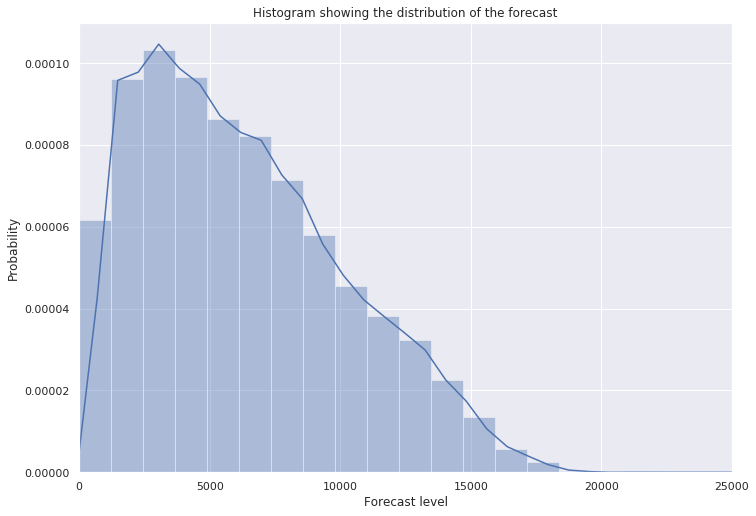

In [0]:
#Data Visualization
# plot of a histogram showing the distribution of the target values

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(wind_actual['forecast'], bins=80)
plt.xlim(xmin=0, xmax = 25000)
plt.title("Histogram showing the distribution of the forecast")
plt.xlabel('Forecast level')
plt.ylabel('Probability')
plt.show()

In [0]:
#What is the distribution of numerical feature values across the samples?
wind_actual.describe()

,forecast,year,month,day,hour,minute
count,630522.000000,630522.000000,630522.000000,630522.000000,630522.000000,630522.000000
mean,6224.874896,2016.255244,6.534938,15.742865,11.501327,27.499794
std,3979.968974,1.797779,3.444397,8.787142,6.919699,17.260198
min,0.000000,2013.000000,1.000000,1.000000,0.000000,0.000000
25%,2996.822500,2015.000000,4.000000,8.000000,6.000000,15.000000
50%,5596.145000,2016.000000,7.000000,16.000000,12.000000,25.000000
75%,8846.957500,2018.000000,9.000000,23.000000,17.000000,45.000000
max,97944.200000,2019.000000,12.000000,31.000000,23.000000,55.000000


Text(0.5, 1.0, 'Forecast Boxplot')

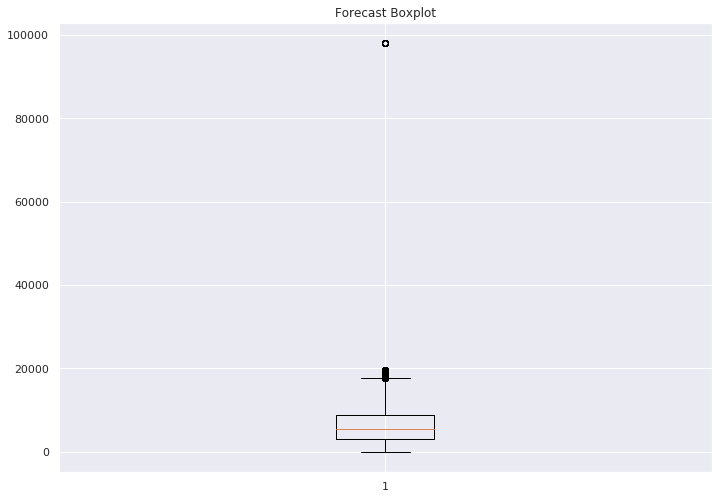

In [0]:
plt.boxplot(wind_actual["forecast"])
plt.title("Forecast Boxplot")

In [0]:
trans_wind_actual=wind_actual

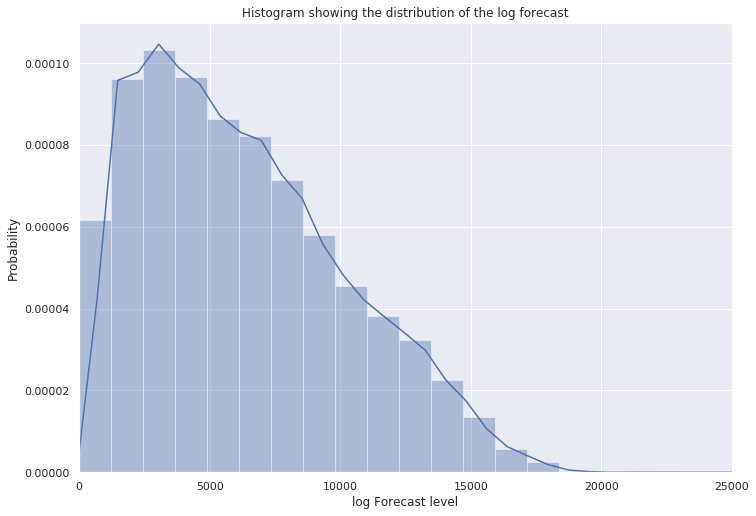

In [0]:
trans_wind_actual["forecast"].apply(np.log)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(trans_wind_actual['forecast'], bins=80)
plt.xlim(xmin=0, xmax = 25000)
plt.title("Histogram showing the distribution of the log forecast")
plt.xlabel('log Forecast level')
plt.ylabel('Probability')
plt.show()

In [0]:
series = pd.read_csv('/content/drive/My Drive/JE/wind_actual_generation.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(style='k.')
plt.title("Plot of Forecast By Years")
plt.xlabel('Year')
plt.ylabel('Forecast')


NameError: ignored

In [0]:
data = pd.read_csv('/content/drive/My Drive/JE/wind_forecast.csv', index_col='ts', parse_dates=True)
data.index.names = ['Date']
data.head()

,ecm,mda
Date,,
2013-01-02 01:00:00-06:00,1733.0,2039.6
2013-01-02 02:00:00-06:00,1780.9,2137.3
2013-01-02 03:00:00-06:00,1739.6,2090.2
2013-01-02 04:00:00-06:00,1738.8,2169.3
2013-01-02 05:00:00-06:00,1552.3,2163.4


In [0]:
data.columns = ['ecm', 'mda']

In [0]:
data.index = pd.to_datetime(data.index, utc=True)

In [0]:
data.dropna().describe()

,ecm,mda
count,58559.000000,58559.000000
mean,5993.608287,5992.330714
std,3754.883680,3552.918700
min,0.000000,0.000000
25%,3077.150000,3206.500000
50%,5375.000000,5356.000000
75%,8204.250000,8059.050000
max,20350.000000,19587.000000


Text(0, 0.5, 'Forecast')

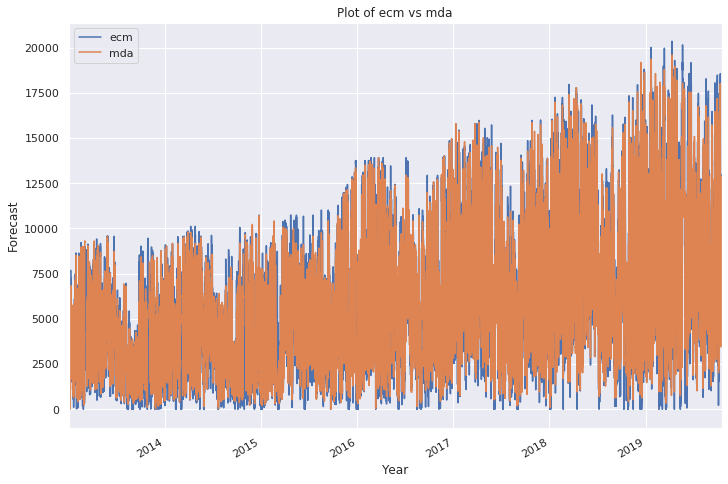

In [0]:
data.plot()
plt.title("Plot of ecm vs mda")
plt.xlabel('Year')
plt.ylabel('Forecast')

In [0]:
%matplotlib inline
import seaborn; seaborn.set()

weekly = data.resample('W').mean()
weekly.plot(style=[':', '--'])
plt.title("Weekly forecast- mean")
plt.xlabel('Year')
plt.ylabel('Mean Forecast')

In [0]:
monthly = data.resample('M').mean()
monthly.plot(style=[':', '--'])
plt.title("Monthly forecast- mean")
plt.xlabel('Year')
plt.ylabel('Mean Forecast')

In [0]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--']);
plt.title("Hourly forecast- mean")
plt.xlabel('Time')
plt.ylabel('Mean Forecast')

In [0]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--']);
plt.title("Daily forecast- mean")
plt.xlabel('Day of the week')
plt.ylabel('Mean Forecast')

In [0]:
wind_actual = pd.read_csv('C:/Users/bzlir/Desktop/DataAnalystAssignment/wind_actual_generation.csv', parse_dates=True)
wind_actual.columns = ['Date', 'forecast']
wind_actual.shape

In [0]:
wind_actual['Date']= pd.to_datetime(wind_actual['Date'], utc=False)
wind_actual = wind_actual.set_index('Date')
wind_actual.dtypes

forecast    float64
year          int64
month         int64
day           int64
hour          int64
minute        int64
Weekday      object
dtype: object

In [0]:

wind_actual['year'] = wind_actual.index.year
wind_actual['month'] = wind_actual.index.month
wind_actual['day'] = wind_actual.index.day
wind_actual['hour'] = wind_actual.index.hour
wind_actual['minute'] = wind_actual.index.minute
wind_actual['Weekday'] = wind_actual.index.weekday_name


In [0]:
wind_actual.head(3)

In [0]:
sns.set(rc={'figure.figsize':(11, 4)})
wind_actual['forecast'].plot(linewidth=0.5);

In [0]:
cols_plot = ['forecast']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Forecast')

In [0]:
wind_forecast.head()


In [0]:
wind_actual = pd.read_csv('C:/Users/bzlir/Desktop/DataAnalystAssignment/wind_actual_generation.csv', parse_dates=True)
wind_actual.columns = ['Date', 'forecast']


wind_forecast = pd.read_csv('C:/Users/bzlir/Desktop/DataAnalystAssignment/wind_forecast.csv', parse_dates=True)
#wind_forecast.index.names = ['Date']
wind_forecast.columns = ['Date','ecm', 'mda']


In [0]:
wind_actual.head()

In [0]:
wind_actual.dtypes

In [0]:
wind_forecast.head()

In [0]:
df1=wind_forecast
df2=wind_actual
output=pd.merge(df1,df2, how='inner')
output.dropna().describe()

In [0]:
output.head()

In [0]:
output['error1'] = output['ecm'] - output['forecast']
output['error2'] = output['mda'] - output['forecast']
output.head()

In [0]:
x = output['error1']
plt.hist(x, bins =100)
plt.title("error1 histogram")
plt.xlabel('bin')
plt.ylabel('error size')

In [0]:
x = output['error2']
plt.hist(x, bins =100)
plt.title("error2 histogram")
plt.xlabel('bin')
plt.ylabel('error size')

In [0]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
np.nan_to_num(output['forecast']) 
np.nan_to_num(output['ecm']) 
np.nan_to_num(output['mda']) 
output['forecast'].astype(np.int64)
output['ecm'].astype(np.int64)
output['mda'].astype(np.int64)
MSE_error_1=mean_absolute_error(output['mda'] , output['forecast'])